# ***Introduction to Radar Using Python and MATLAB***
## Andy Harrison - Copyright (C) 2019 Artech House
<br/>

# Plane Waves
***

Referring to Section 2.5, The solutions to (Equations 2.53 and 2.54) represent waves.  Waves with one-dimensional spatial dependence are known as **plane waves**.  A particular form of this solution, known as **uniform plane waves**, has an electric field with uniform direction, magnitude, and phase in infinite planes perpendicular to the direction of propagation. The same is also true of the magnetic field.  Uniform plane waves cannot exist in practice, as it requires a source of infinite extent to create such electric and magnetic fields.  However, if the observer is far enough away from the source, the surfaces of constant phase **wavefronts** become nearly spherical.  On a very small portion of a very large sphere, the wavefront then becomes nearly planar. While the properties of uniform plane waves are simple, their study is of importance both theoretically and practically.
***

Begin by getting library path

In [1]:
import lib_path

Set up the frequency (Hz), the relative permittivity, the relative permeability, and the conductivity (S/m)

In [2]:
frequency = 300e6

relative_permittivity = 4.3

relative_permeability = 1.0

conductivity = 0.05

Set up the keyword args

In [3]:
kwargs = {'frequency':              frequency,

          'relative_permittivity':  relative_permittivity,

          'relative_permeability':  relative_permeability,

          'conductivity':           conductivity}

Calculate the plane wave parameters using the `plane_wave` routines from `wave_propagation`

In [4]:
from Libs.wave_propagation import plane_waves

propagation_constant, phase_constant, attenuation_constant, wave_impedance, skin_depth, wavelength, phase_velocity = plane_waves.parameters(**kwargs)

Display the plane wave parameters

In [5]:
print('Propagation Constant (1/m)  {:.3e}'.format(propagation_constant))

print('Phase Constant (rad/m)      {:.3e}'.format(phase_constant))

print('Attenuation Constant (Np/m) {:.3e}'.format(attenuation_constant))

print('Wave Impedance (Ohms)       {:.3e}'.format(wave_impedance))

print('Skin Depth (m)              {:.3e}'.format(skin_depth))

print('Wavelength (m)              {:.3e}'.format(wavelength))

print('Phase Velocity (m/s)        {:.3e}'.format(phase_velocity))

Propagation Constant (1/m)  4.312e+00+1.373e+01j
Phase Constant (rad/m)      1.373e+01
Attenuation Constant (Np/m) 4.312e+00
Wave Impedance (Ohms)       1.570e+02+4.930e+01j
Skin Depth (m)              2.319e-01
Wavelength (m)              4.575e-01
Phase Velocity (m/s)        1.373e+08


Display the results using the routines from `matplotlib`

In [6]:
from numpy import linspace

# Determine 2 lambda distance for plotting

z = linspace(0, 2.0 * wavelength, 1000)

Set up the angular frequency

In [7]:
from scipy.constants import pi

omega = 2.0 * pi * frequency

Set up the time

In [8]:
next_time = 10

time = next_time / omega * 0.1

Calculate the electric and magnetic fields

In [9]:
from numpy import exp, real

exp_term = exp(-propagation_constant * z) * exp(1j * omega * time)

Ex = real(exp_term)

Hy = real(exp_term / wave_impedance)

Display the fields using the routines from `matplotlib`

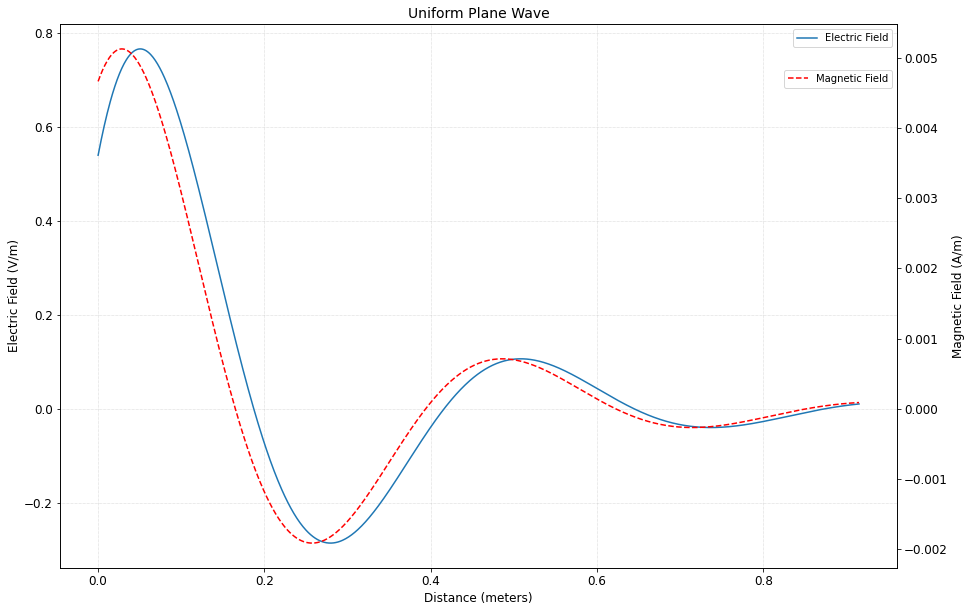

In [10]:
from matplotlib import pyplot as plt


# Set the figure size

plt.rcParams["figure.figsize"] = (15, 10)


# Set up the axes

fig, axes1 = plt.subplots()

axes2 = axes1.twinx()



# Display the fields

axes1.plot(z, Ex, label='Electric Field')

axes2.plot(z, Hy, 'r--', label='Magnetic Field')



# Set the plot title and labels

axes1.set_title('Uniform Plane Wave', size=14)

axes1.set_xlabel('Distance (meters)', size=12)

axes1.set_ylabel('Electric Field (V/m)', size=12)

axes2.set_ylabel('Magnetic Field (A/m)', size=12)



# Set the tick label size

axes1.tick_params(labelsize=12)

axes2.tick_params(labelsize=12)



# Set the legend

axes1.legend(loc='upper right', prop={'size': 10})

axes2.legend(loc='upper right', bbox_to_anchor=(1.0, 0.925), prop={'size': 10})



# Turn on the grid

axes1.grid(linestyle=':', linewidth=0.5)